# **Import data from google drive**

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1bfKxTD7CU9q_lvEHpOCqHJhiU1pZ6aHV"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('hotel_bookings.csv') 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
hb=pd.read_csv("hotel_bookings.csv")
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Data Preprocessing**

Data Preprocessing

In [ ]:
hb.isnull().sum().sort_values(ascending=False)/hb.shape[0]

company                           0.943069
agent                             0.136862
country                           0.004087
children                          0.000034
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
is_canceled                       0.000000
market_segment                    0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
babies                            0.000000
meal                              0.000000
reservation_status_date           0.000000
distribution_channel              0.000000
reservation_status                0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_ro

In [ ]:
hb_new = hb.copy()

In [ ]:
hb_new.drop("company",axis=1,inplace=True)

In [ ]:
hb_new.agent.fillna(0, inplace=True)

In [ ]:
hb_new.country.fillna(hb_new.country.mode()[0],inplace=True)

In [ ]:
hb_new.children.fillna(hb_new.children.median(), inplace=True)

In [ ]:
hb_new.isnull().sum().sort_values(ascending=False)

reservation_status_date           0
market_segment                    0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
reservation_status                0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
hb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hb_new.children = hb_new.children.astype(int)
hb_new.agent = hb_new.agent.astype(int)

In [ ]:
hb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hb_new.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
guests_0 = list(hb_new["adults"] + hb_new["children"] + hb_new["babies"] == 0)
hb_new.drop(hb_new.index[guests_0],inplace=True)

In [ ]:
hb_new[hb_new['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [ ]:
hb_new = hb_new.drop(hb_new[hb_new.adr >2000].index)

In [ ]:
pd.concat([hb_new[hb_new.babies>3], hb_new[hb_new.children>3]]).T

,46619,78656,328
hotel,City Hotel,City Hotel,Resort Hotel
is_canceled,0,0,1
lead_time,37,11,55
arrival_date_year,2016,2015,2015
arrival_date_month,January,October,July
arrival_date_week_number,3,42,29
arrival_date_day_of_month,12,11,12
stays_in_weekend_nights,0,2,4
stays_in_week_nights,2,1,10
adults,2,1,2


In [ ]:
hb_new.drop([14969, 46619, 78656, 328], inplace=True)

In [ ]:
hb_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119205 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119205 non-null  object 
 1   is_canceled                     119205 non-null  int64  
 2   lead_time                       119205 non-null  int64  
 3   arrival_date_year               119205 non-null  int64  
 4   arrival_date_month              119205 non-null  object 
 5   arrival_date_week_number        119205 non-null  int64  
 6   arrival_date_day_of_month       119205 non-null  int64  
 7   stays_in_weekend_nights         119205 non-null  int64  
 8   stays_in_week_nights            119205 non-null  int64  
 9   adults                          119205 non-null  int64  
 10  children                        119205 non-null  int64  
 11  babies                          119205 non-null  int64  
 12  meal            

In [ ]:
hb_new.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119205.0,0.370765,0.483012,0.0,0.0,0.00,1.0,1.0
lead_time,119205.0,104.110801,106.876568,0.0,18.0,69.00,161.0,737.0
arrival_date_year,119205.0,2016.156487,0.707480,2015.0,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119205.0,27.163701,13.600991,1.0,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119205.0,15.798834,8.781133,1.0,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119205.0,0.927008,0.995046,0.0,0.0,1.00,2.0,19.0
stays_in_week_nights,119205.0,2.499132,1.896984,0.0,1.0,2.00,3.0,50.0
adults,119205.0,1.859209,0.575192,0.0,2.0,2.00,2.0,55.0
children,119205.0,0.103964,0.397812,0.0,0.0,0.00,0.0,3.0
babies,119205.0,0.007802,0.089401,0.0,0.0,0.00,0.0,2.0


# **Descriptive analysis**

<font face="timesnewroman" size=2 color=#A52A2A > Comment: This section is a supplement to the descriptive analysis in data dictionary.xlsx.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

<font face="timesnewroman" size=4 color=#A52A2A > 2.1 Load dataset

In [ ]:
# hb=pd.read_csv("hb.csv")

<font face="timesnewroman" size=4 color=#A52A2A > 2.2 Data Overview

In [ ]:
hb_new

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07


<font face="timesnewroman" size=4 color=#A52A2A > 2.3 Descriptive Analysis

<font face="timesnewroman" size=3 color=#A52A2A > lead time

In [ ]:
(pd.DataFrame(hb_new.lead_time)).describe()

,lead_time
count,119205.000000
mean,104.110801
std,106.876568
min,0.000000
25%,18.000000
50%,69.000000
75%,161.000000
max,737.000000


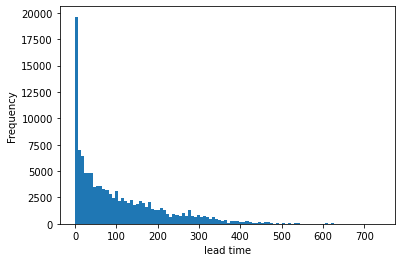

In [ ]:
from matplotlib import pyplot
lead_time=hb_new.lead_time
def drawHist(lead_time):
    pyplot.hist(hb_new.lead_time, 100)
    pyplot.xlabel('lead time')
    pyplot.ylabel('Frequency')
    pyplot.show()
drawHist(lead_time)

<font face="timesnewroman" size=3 color=#A52A2A > arrival date week number

In [ ]:
(pd.DataFrame(hb_new.arrival_date_week_number)).describe()

,arrival_date_week_number
count,119205.000000
mean,27.163701
std,13.600991
min,1.000000
25%,16.000000
50%,28.000000
75%,38.000000
max,53.000000


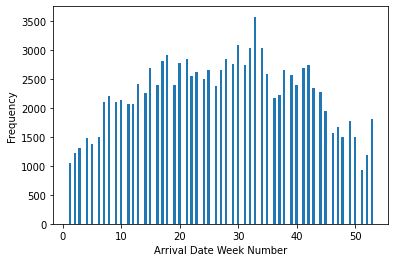

In [ ]:
from matplotlib import pyplot
arrival_date_week_number=hb_new.arrival_date_week_number
def drawHist(arrival_date_week_number):
    pyplot.hist(hb_new.arrival_date_week_number, 125)
    pyplot.xlabel('Arrival Date Week Number')
    pyplot.ylabel('Frequency')
    pyplot.show()
drawHist(arrival_date_week_number)

<font face="timesnewroman" size=3 color=#A52A2A > stays in weekend nights

In [ ]:
(pd.DataFrame(hb_new.stays_in_weekend_nights)).describe()

,stays_in_weekend_nights
count,119205.000000
mean,0.927008
std,0.995046
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,19.000000


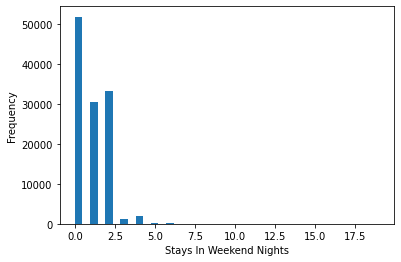

In [ ]:
from matplotlib import pyplot
stays_in_weekend_nights=hb_new.stays_in_weekend_nights
def drawHist(stays_in_weekend_nights):
    pyplot.hist(hb_new.stays_in_weekend_nights, 40)
    pyplot.xlabel('Stays In Weekend Nights')
    pyplot.ylabel('Frequency')
    pyplot.show()
drawHist(stays_in_weekend_nights)

<font face="timesnewroman" size=3 color=#A52A2A > stays in week nights

In [ ]:
(pd.DataFrame(hb_new.stays_in_week_nights)).describe()

,stays_in_week_nights
count,119205.000000
mean,2.499132
std,1.896984
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,50.000000


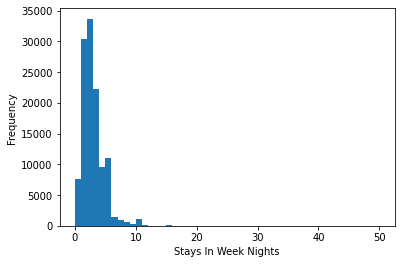

In [ ]:
from matplotlib import pyplot
stays_in_week_nights=hb_new.stays_in_week_nights
def drawHist(stays_in_week_nights):
    pyplot.hist(hb_new.stays_in_week_nights, 50)
    pyplot.xlabel('Stays In Week Nights')
    pyplot.ylabel('Frequency')
    pyplot.show()
drawHist(stays_in_week_nights)

<font face="timesnewroman" size=3 color=#A52A2A > Average Daily Rate

In [ ]:
(pd.DataFrame(hb.adr)).describe()

,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


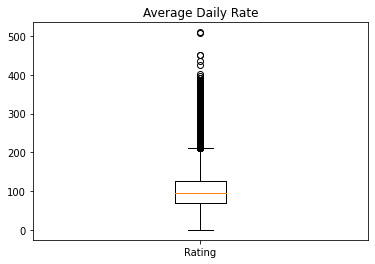

In [ ]:
from matplotlib import pyplot
adr=hb.adr
def drawBox(adr):
    pyplot.boxplot([hb_new.adr], labels=['Rating'])
    pyplot.title('Average Daily Rate')
    pyplot.show()
drawBox(adr)

<font face="timesnewroman" size=3 color=#A52A2A > Number of car parking spaces required by the customer

In [ ]:
(pd.DataFrame(hb_new.required_car_parking_spaces)).describe()

,required_car_parking_spaces
count,119205.000000
mean,0.062556
std,0.245364
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


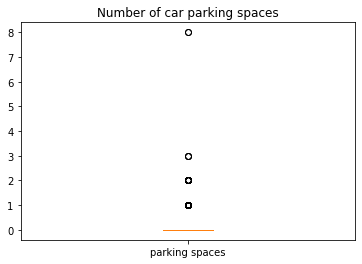

In [ ]:
from matplotlib import pyplot
required_car_parking_spaces=hb_new.required_car_parking_spaces
def drawBox(required_car_parking_spaces):
    pyplot.boxplot([hb_new.required_car_parking_spaces], labels=['parking spaces'])
    pyplot.title('Number of car parking spaces')
    pyplot.show()
drawBox(required_car_parking_spaces)

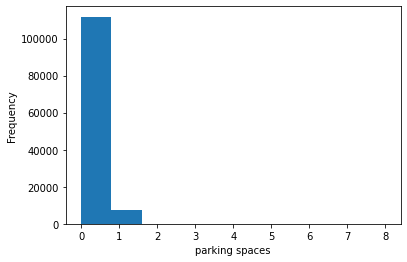

In [ ]:
from matplotlib import pyplot
required_car_parking_spaces=hb_new.required_car_parking_spaces
def drawHist(required_car_parking_spaces):
    pyplot.hist(hb_new.required_car_parking_spaces, 10)
    pyplot.xlabel('parking spaces')
    pyplot.ylabel('Frequency')
    pyplot.show()
drawHist(required_car_parking_spaces)

<font face="timesnewroman" size=3 color=#A52A2A > Number of special requests made by the customer

In [ ]:
(pd.DataFrame(hb_new.total_of_special_requests)).describe()

,total_of_special_requests
count,119205.000000
mean,0.571511
std,0.792885
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


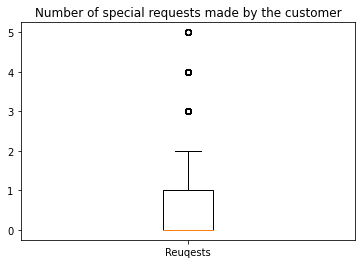

In [ ]:
from matplotlib import pyplot
total_of_special_requests=hb_new.total_of_special_requests
def drawBox(total_of_special_requests):
    pyplot.boxplot([hb_new.total_of_special_requests], labels=['Reuqests'])
    pyplot.title('Number of special requests made by the customer')
    pyplot.show()
drawBox(total_of_special_requests)

# **Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly 
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf

### Cancellation Situation

In [ ]:
hotel_eda = hb_new.copy()
hotel_eda['hotel'].value_counts()

City Hotel      79160
Resort Hotel    40045
Name: hotel, dtype: int64

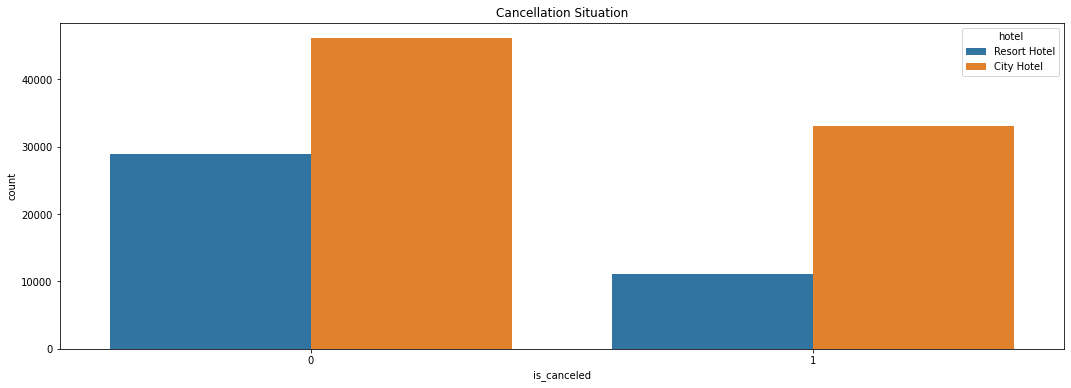

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='is_canceled', hue = 'hotel', data= hotel_eda)
plt.title('Cancellation Situation')
plt.show()

In [ ]:
hotel_eda['is_canceled'].value_counts()/hb_new.shape[0]*100

0    62.923535
1    37.076465
Name: is_canceled, dtype: float64

The cancel rate of the hotel is 37.04%, the rate of not cancel is 62.96%.

### Booking rate

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [ ]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values


In [ ]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



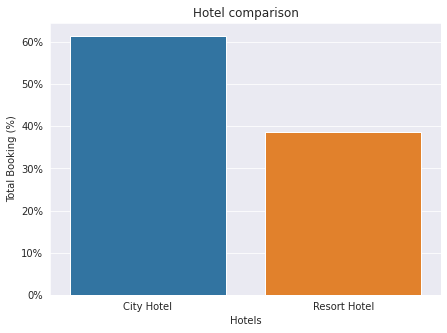

In [ ]:
df_not_canceled = hb_new[hb_new['is_canceled'] == 0]
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

### Monthly cancellations and customer by hotel types

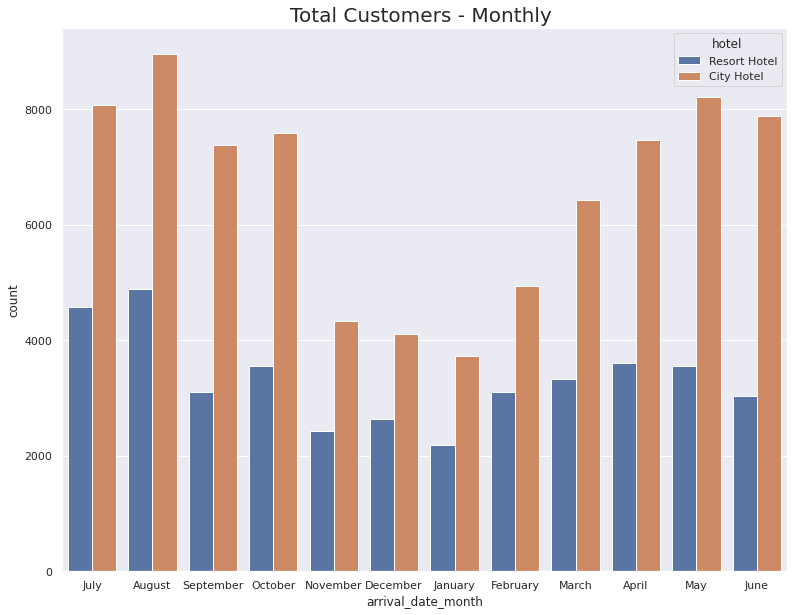

In [ ]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = hb_new)

Text(0.5, 1.0, 'Monthly Cancellation Rate')

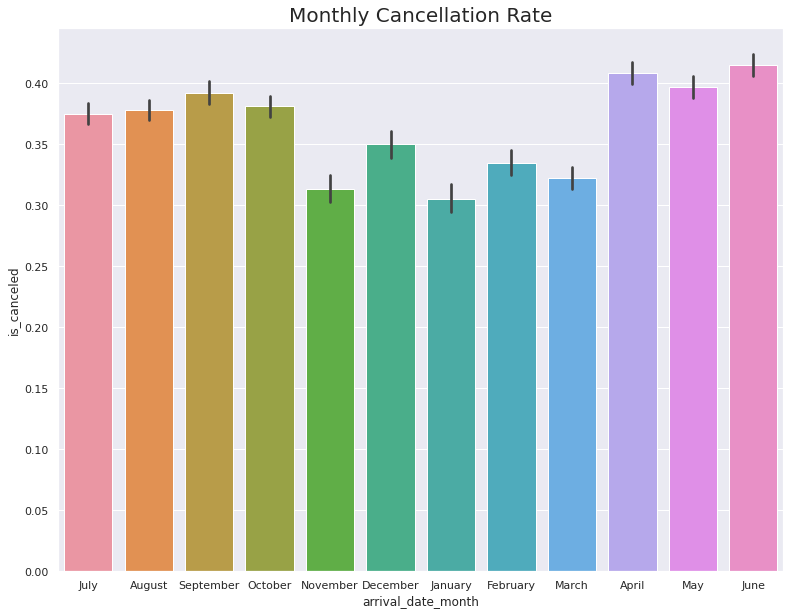

In [ ]:
plt.figure(figsize = (13,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = hb_new);
plt.title('Monthly Cancellation Rate', fontdict={'fontsize': 20})

Text(0.5, 1.0, 'Monthly Cancellation Rate by Hotel')

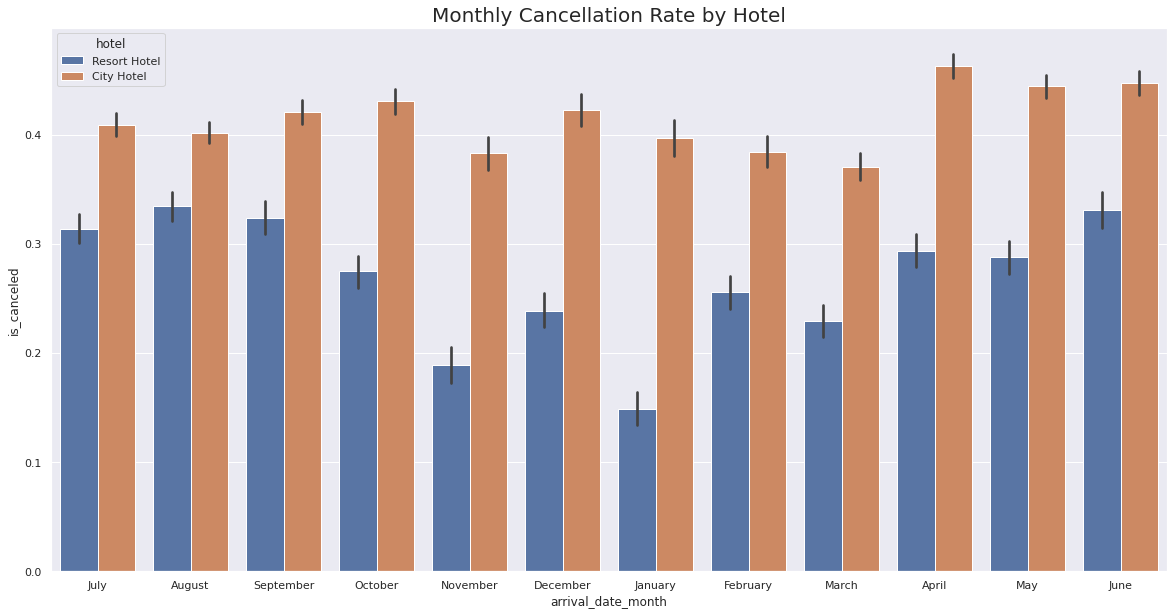

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = hb_new);
plt.title('Monthly Cancellation Rate by Hotel', fontdict={'fontsize': 20})

### Percentage of booking per year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



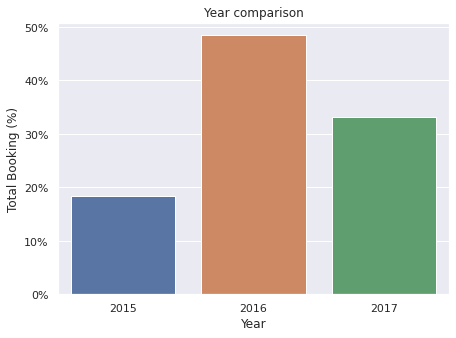

In [ ]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

### Busiest month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



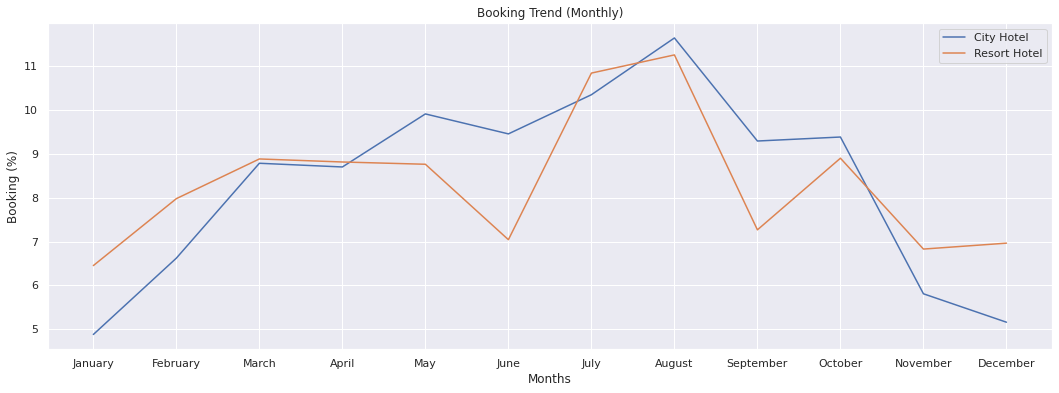

In [ ]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


## Select only City Hotel
sorted_months = df_not_canceled.loc[hb_new.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df_not_canceled.loc[hb_new.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100






## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

### Country of customers

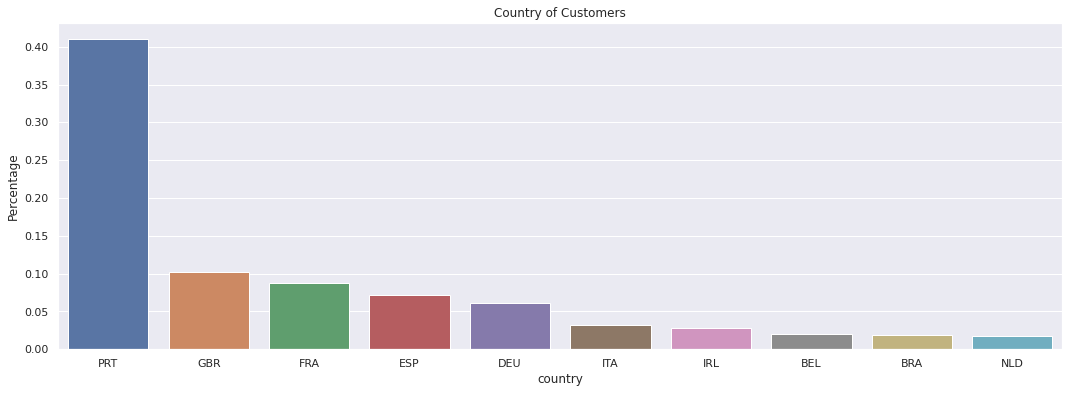

In [ ]:
plt.figure(figsize=(18,6))
country_booking = hb_new['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
sns.barplot(x='country', y='Percentage', data=country_booking.head(10))
plt.title('Country of Customers')
plt.show()

### How long people stay

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



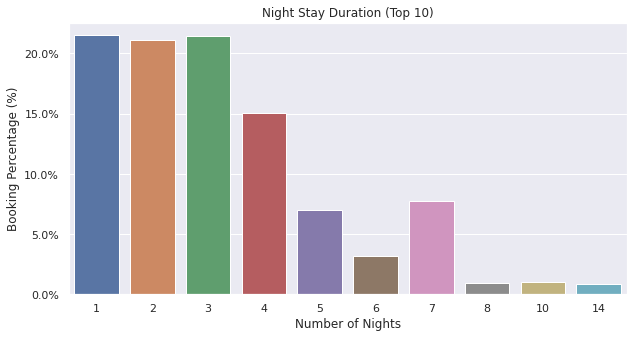

In [ ]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))


### Accomodation type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



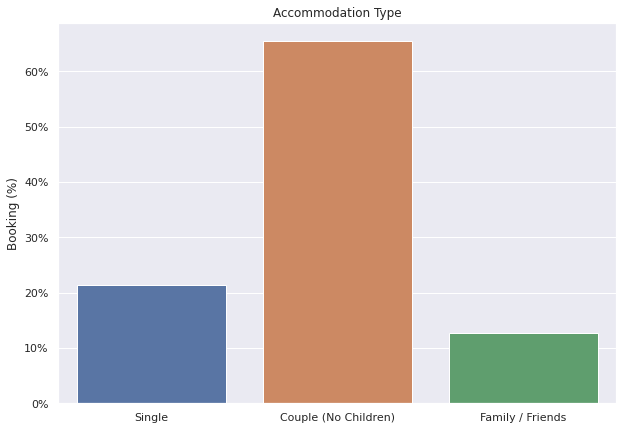

In [ ]:
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))


### Customer type

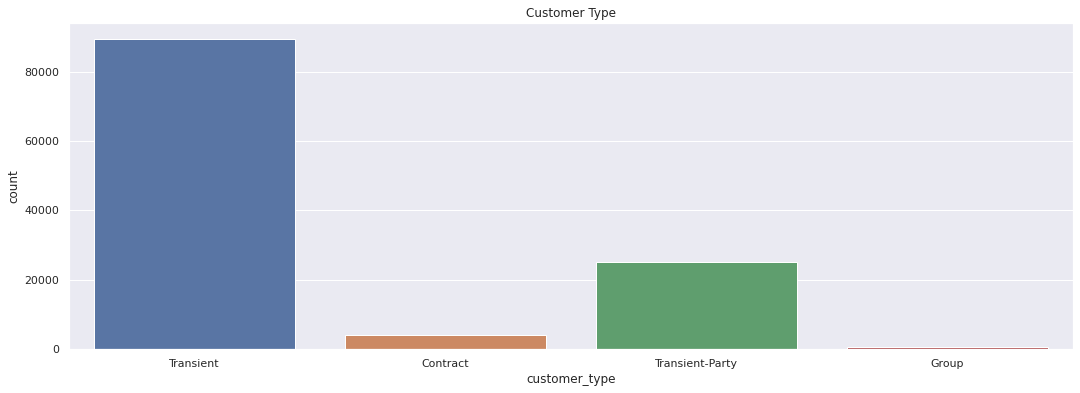

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='customer_type', data= hb_new)
plt.title('Customer Type')
plt.show()

Type of booking, assuming one of four categories:

Contract, when the booking has an allotment or other type of contract associated to it.

Group, when the booking is associated to a group.

Transient, when the booking is not part of a group or contract, and is not associated to other transient booking.

Transient-party, when the booking is transient, but is associated to at least other transient booking.

From the graph:

Transient as much as 75.05%.

Transient-party as much as 21.04%.

Contract as much as 3.41%.

Group as much as 0.48%.

Most of customers is Transient, means they are walk-in guests, last-minute or bookers, or simply people that require a very short-term stay in your facility. Transient customers are one of the major market segments consist of individuals or groups.

### Distribution of nights spent at hotels by market segment and hotel type

weekdays

Text(0.5, 1.0, 'Weekdays')

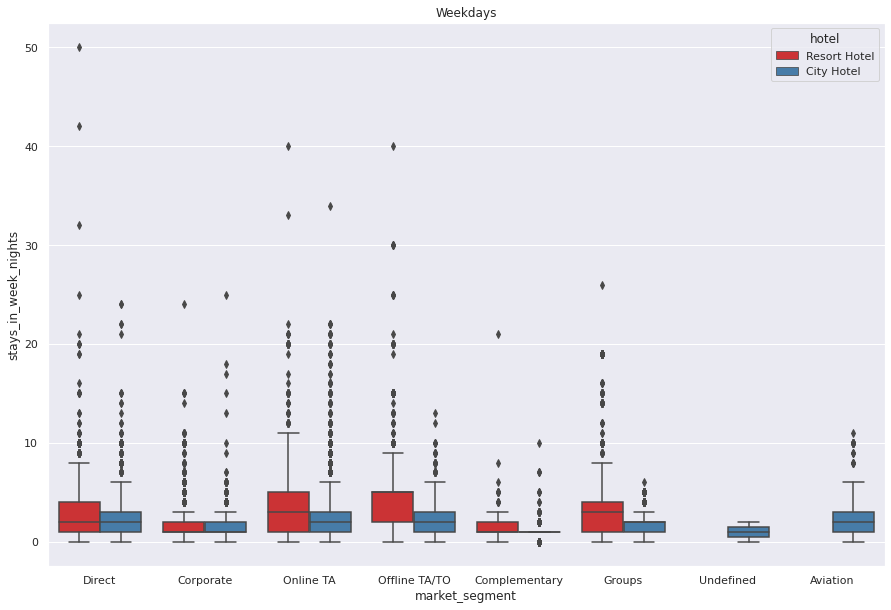

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = hb_new, hue = "hotel", palette = 'Set1')
plt.title('Weekdays')

weekends

Text(0.5, 1.0, 'Weekends')

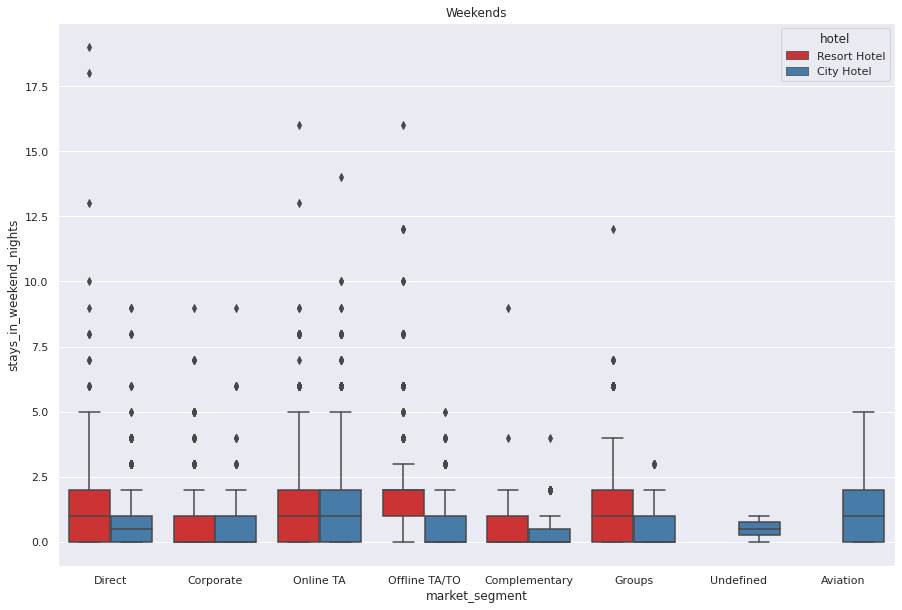

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = hb_new, hue = "hotel", palette = 'Set1')
plt.title('Weekends')

# **Feature engineering**

In [ ]:
hb_new['hotel'] = hb_new['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

hb_new['arrival_date_month'] = hb_new['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [ ]:
def family(hb_new):
    if ((hb_new['adults'] > 0) & (hb_new['children'] > 0)):
        val = 1
    elif ((hb_new['adults'] > 0) & (hb_new['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

def deposit(hb_new):
    if ((hb_new['deposit_type'] == 'No Deposit') | (hb_new['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [ ]:
def feature(hb_new):
    hb_new["is_family"] = hb_new.apply(family, axis = 1)
    hb_new["total_customer"] = hb_new["adults"] + hb_new["children"] + hb_new["babies"]
    hb_new["deposit_given"] = hb_new.apply(deposit, axis=1)
    hb_new["total_nights"] = hb_new["stays_in_weekend_nights"]+ hb_new["stays_in_week_nights"]
    return hb_new

hb_new = feature(hb_new)

In [ ]:
hb_new = hb_new.drop(columns = ['adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])

In [ ]:
cor_data = hb_new.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['agent'] = le.fit_transform(cor_data['agent'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])

In [ ]:
cor_data.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,0.137096,0.075990,0.035185,0.001770,0.001239,-0.001698,-0.187761,-0.235901,0.007276,0.084117,0.174980,-0.052468,-0.012262,-0.004452,-0.250479,-0.312828,-0.076563,-0.649268,0.072726,0.047683,0.102756,-0.218968,-0.043476,-0.124811,-0.058106,-0.038832,0.172404,-0.249690
is_canceled,0.137096,1.000000,0.292893,0.016638,0.011179,0.008313,-0.005969,-0.001326,0.025516,-0.017226,0.059407,0.167682,-0.083721,0.110142,-0.057358,-0.062225,-0.175833,-0.144857,-0.046994,0.054303,-0.068152,0.047578,-0.195705,-0.234888,-0.917239,-0.013220,0.044933,0.481501,0.018533
lead_time,0.075990,0.292893,1.000000,0.040307,0.131609,0.127053,0.002313,0.085982,0.166899,0.001413,0.013271,0.220225,-0.123270,0.086025,-0.073612,-0.105985,-0.171271,0.002243,-0.012434,0.170008,0.073289,-0.067643,-0.116629,-0.095950,-0.301959,-0.044216,0.070572,0.380147,0.158301
arrival_date_year,0.035185,0.016638,0.040307,1.000000,-0.527545,-0.540381,-0.000121,0.021719,0.031230,0.065639,0.107908,0.022643,0.010222,-0.119911,0.029220,0.092909,0.035735,0.031451,0.053798,-0.056352,-0.006281,0.208549,-0.013818,0.108618,-0.017597,0.052901,0.053267,-0.065982,0.031826
arrival_date_month,0.001770,0.011179,0.131609,-0.527545,1.000000,0.995101,-0.026338,0.018847,0.019750,-0.015013,0.001429,0.007525,-0.031663,0.037472,-0.021735,-0.007968,-0.006527,0.005612,-0.016629,0.018799,-0.029723,0.084843,0.000319,0.028088,-0.021210,0.010491,0.027968,0.008830,0.022129
arrival_date_week_number,0.001239,0.008313,0.127053,-0.540381,0.995101,1.000000,0.066570,0.018628,0.016060,-0.017155,-0.000373,0.005845,-0.031074,0.035492,-0.020998,-0.008017,-0.005738,0.006356,-0.017594,0.022674,-0.028392,0.081016,0.001974,0.026203,-0.017513,0.010673,0.025899,0.007849,0.019289
arrival_date_day_of_month,-0.001698,-0.005969,0.002313,-0.000121,-0.026338,0.066570,1.000000,-0.016174,-0.028329,-0.006717,-0.004004,0.001631,-0.006416,-0.027029,-0.000293,0.017301,0.012683,0.011306,0.000010,0.022530,0.012238,0.030807,0.008566,0.003025,0.011342,0.014749,0.006804,-0.008675,-0.027488
stays_in_weekend_nights,-0.187761,-0.001326,0.085982,0.021719,0.018847,0.018628,-0.016174,1.000000,0.494111,0.044600,0.116005,0.093602,-0.086168,-0.012765,-0.042893,0.143012,0.084488,0.050064,0.164765,-0.054398,-0.110158,0.054100,-0.018510,0.073141,0.008092,0.052614,0.103818,-0.114544,0.760632
stays_in_week_nights,-0.235901,0.025516,0.166899,0.031230,0.019750,0.016060,-0.028329,0.494111,1.000000,0.035637,0.109544,0.088018,-0.095405,-0.013974,-0.048895,0.170159,0.098674,0.079915,0.200213,-0.002021,-0.128581,0.070924,-0.024927,0.068729,-0.022435,0.050861,0.104395,-0.080298,0.940236
meal,0.007276,-0.017226,0.001413,0.065639,-0.015013,-0.017155,-0.006717,0.044600,0.035637,1.000000,0.146805,0.118342,-0.059142,-0.003658,-0.040467,-0.122455,-0.127773,0.020116,-0.017257,-0.007169,0.044492,0.065792,-0.039064,0.023593,0.015052,-0.041310,-0.001263,-0.090320,0.044079


In [ ]:
cor_data.corr()["is_canceled"].sort_values(ascending = False)

is_canceled                       1.000000
deposit_given                     0.481501
lead_time                         0.292893
distribution_channel              0.167682
hotel                             0.137096
previous_cancellations            0.110142
market_segment                    0.059407
days_in_waiting_list              0.054303
adr                               0.047578
total_customer                    0.044933
stays_in_week_nights              0.025516
total_nights                      0.018533
arrival_date_year                 0.016638
arrival_date_month                0.011179
arrival_date_week_number          0.008313
stays_in_weekend_nights          -0.001326
arrival_date_day_of_month        -0.005969
is_family                        -0.013220
meal                             -0.017226
agent                            -0.046994
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.062225
customer_type                    -0.068152
is_repeated

### Correlation heatmap

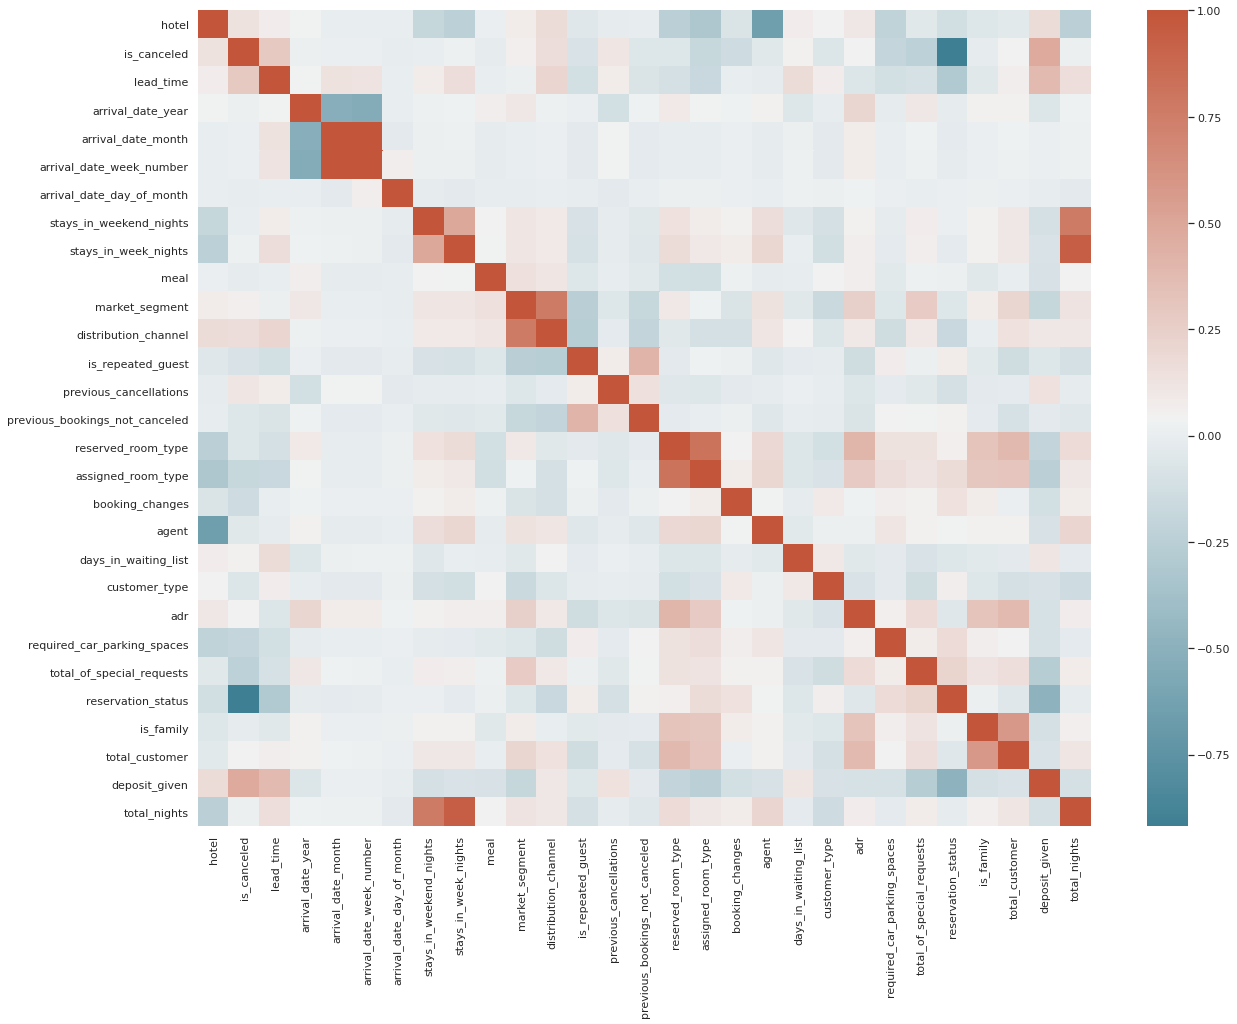

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
corr = cor_data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
cor_data = cor_data.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [ ]:
indices = cor_data.loc[pd.isna(cor_data["country"]), :].index 
cor_data = cor_data.drop(cor_data.index[indices])   
cor_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
is_family                         0
total_customer                    0
deposit_given                     0
dtype: int64

In [ ]:
indices = hb_new.loc[pd.isna(hb_new["country"]), :].index 
hb_new = hb_new.drop(hb_new.index[indices])   
hb_new = hb_new.drop(columns = ['arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

### One-hot encoding

In [ ]:
df1 = hb_new.copy()

In [ ]:
df1 = pd.get_dummies(data = df1, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])

In [ ]:
df1['country'] = le.fit_transform(df1['country']) 

# **Logistic regression**

In [ ]:
df2 = df1.drop(columns = ['reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
y = df2["is_canceled"]
X = df2.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.linear_model import LogisticRegression

print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Model: Logistic Regression

Accuracy Score: 0.8024998601867904

Confusion Matrix:
 [[20537  1841]
 [ 5222  8162]]


Text(0.5, 1.0, 'ROC for logistic regression')

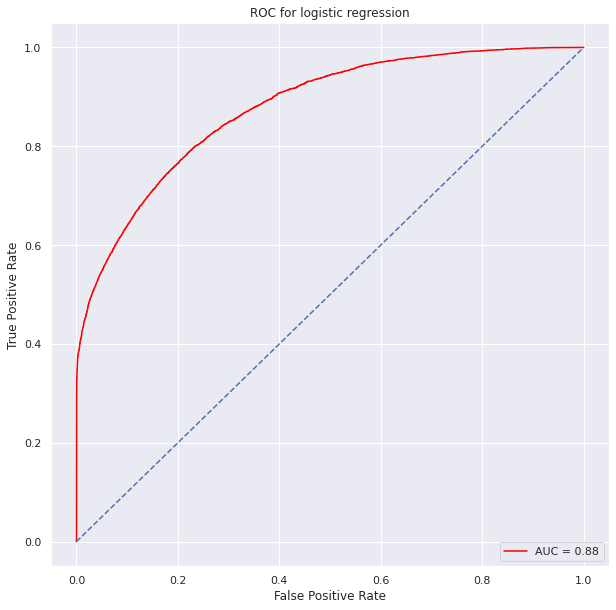

In [ ]:
ROC(y_test, y_prob)
plt.title('ROC for logistic regression')

# **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8855489066607013

Confusion Matrix:
 [[20962  1416]
 [ 2677 10707]]


Text(0.5, 1.0, 'ROC for random forest')

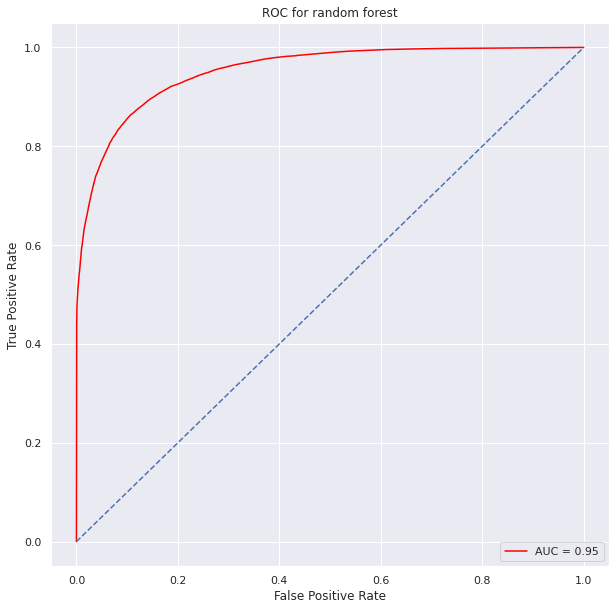

In [ ]:
ROC(y_test, y_prob)
plt.title('ROC for random forest')

### Feature Importances

Text(0.5, 0, 'Feature Importances (%)')

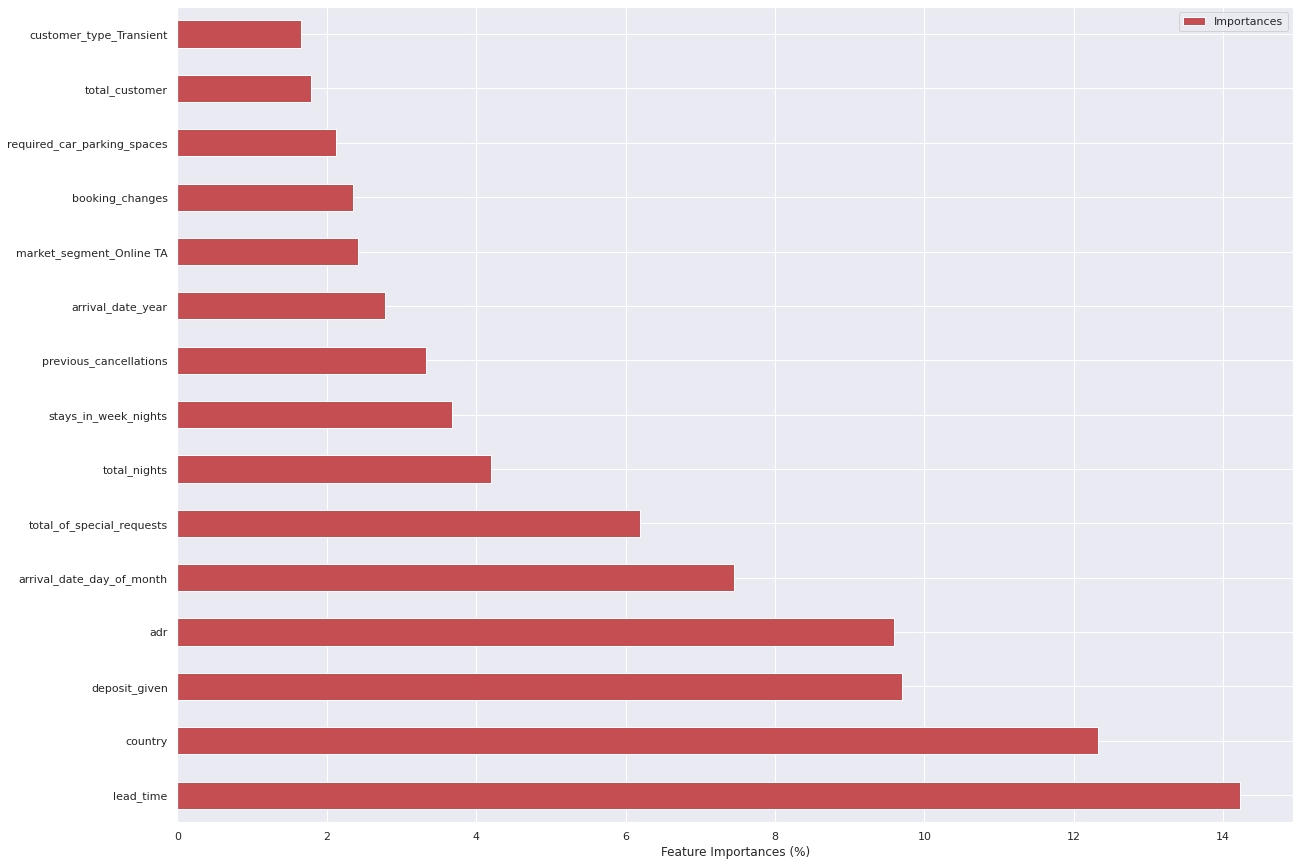

In [ ]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")